# Exercise 5.25

In [1]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.linalg as la
from scipy import stats
from chapter_5_utils import plot_control_ellipse

In [2]:
def load_data() -> pd.DataFrame:
    # Five types of overtime hours for the Madison, Wisconsin, Police.
    fpth = pathlib.Path(r'..\..\data\Table5.8.xlsx')
    return pd.read_excel(fpth)

In [3]:
overtime_df = load_data()[['Holdover Hours', 'COA Hours']]
overtime_df.head(3)

,Holdover Hours,COA Hours
0,1181,14861
1,3532,11367
2,2502,13329


In [4]:
n, p = overtime_df.shape
alpha = 0.05
X = overtime_df.to_numpy()

In [5]:
xbar = np.mean(X, axis=0).reshape(p, 1)
xbar

array([[ 2676.875],
       [13563.625]])

In [6]:
S = np.cov(X, rowvar=False)
S

array([[ 1458543.05      , -1113809.78333333],
       [-1113809.78333333,  1698324.38333333]])

Compute the $T^{2}$ values, using ${(\textbf{x} - \bar{\textbf{x}})}^{\prime} \textbf{S}^{-1} {(\textbf{x} - \bar{\textbf{x}})}$

In [7]:
T2 = list()
for i in range(n):
    T2.append(((X[i,:].reshape(p,1) - xbar).T @ la.inv(S) @ (X[i, :].reshape(p,1) - xbar)).item())

In [8]:
ucl_crit = stats.chi2.ppf(1-alpha, p)
ucl_crit

5.991464547107979

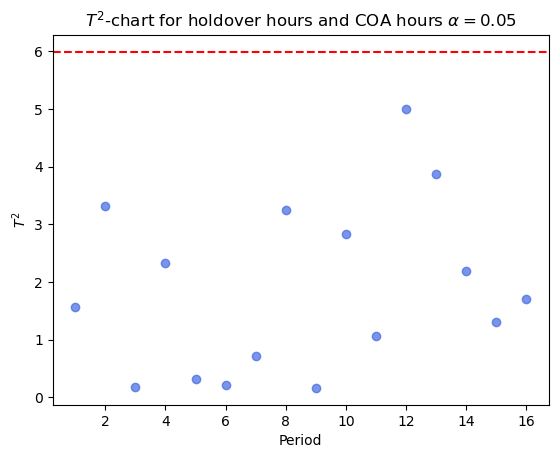

In [9]:
plt.axhline(y=ucl_crit, color='r', linestyle='--')
plt.scatter(np.arange(n)+1, T2, alpha=0.70, facecolors='royalblue', edgecolors='royalblue')
# plt.ylim([-1, 12])
plt.title(f'$T^{2}$-chart for holdover hours and COA hours $\\alpha={alpha}$')
plt.xlabel('Period')
plt.ylabel('$T^{2}$')
plt.savefig('Question-5-25-T2.png')
plt.show()

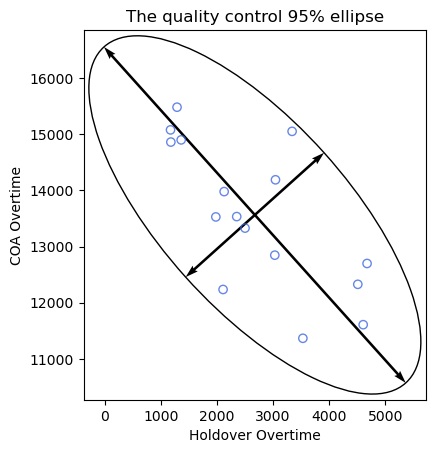

In [10]:
a_plt, a_ax = plot_control_ellipse(X, alpha)
a_plt.scatter(overtime_df['Holdover Hours'],
              overtime_df['COA Hours'],
              facecolors='none',
              edgecolors='royalblue',
              alpha=0.8)
a_ax.set_aspect('equal')
# a_ax.set_aspect(aspect=0.7, adjustable='datalim')
a_ax.set_title(f'The quality control {(1-alpha)*100:.0f}% ellipse')
a_plt.xlabel('Holdover Overtime')
a_plt.ylabel('COA Overtime')
a_plt.savefig('Question-5-25-QC-Ellipse.png')
a_plt.show()